## APS Failure

In [83]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
aps = pd.read_csv('data/aps_training.csv')
aps_test = pd.read_csv('data/aps_test.csv')

In [3]:
aps.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   class   object
 1   aa_000  int64 
 2   ab_000  object
 3   ac_000  object
 4   ad_000  object
 5   ae_000  object
 6   af_000  object
 7   ag_000  object
 8   ag_001  object
 9   ag_002  object
 10  ag_003  object
 11  ag_004  object
 12  ag_005  object
 13  ag_006  object
 14  ag_007  object
 15  ag_008  object
 16  ag_009  object
 17  ah_000  object
 18  ai_000  object
 19  aj_000  object
 20  ak_000  object
 21  al_000  object
 22  am_0    object
 23  an_000  object
 24  ao_000  object
 25  ap_000  object
 26  aq_000  object
 27  ar_000  object
 28  as_000  object
 29  at_000  object
 30  au_000  object
 31  av_000  object
 32  ax_000  object
 33  ay_000  object
 34  ay_001  object
 35  ay_002  object
 36  ay_003  object
 37  ay_004  object
 38  ay_005  object
 39  ay_006  object
 40  ay_007  object
 41  ay_008  object
 42  ay_00

In [4]:
aps['ag_000'].value_counts()

0        59133
na         671
2            9
16186        5
11912        5
         ...  
58806        1
510          1
58270        1
2514         1
3304         1
Name: ag_000, Length: 155, dtype: int64

In [5]:
aps['class'].loc[aps['class'] == 'na']

Series([], Name: class, dtype: object)

In [6]:
aps_test['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [7]:
aps['class'] = aps['class'].map(lambda x: 0 if x == 'neg' else 1)

In [8]:
aps_test['class'] = aps_test['class'].map(lambda x: 0 if x == 'neg' else 1)

In [9]:
total_na = 0
for c in aps.columns:
    total_na += len(aps[c].loc[aps[c] == 'na'])
total_na

850015

In [10]:
for c in aps.columns:
    aps[c] = aps[c].map(lambda x: np.nan if x == 'na' else x)

In [11]:
for c in aps.columns:
    aps_test[c] = aps_test[c].map(lambda x: np.nan if x == 'na' else x)

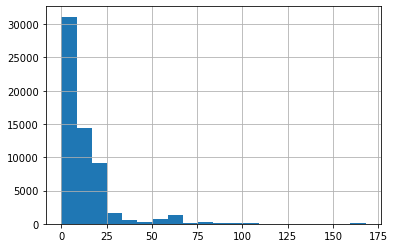

In [12]:
na_in_rows = []
for r in range(len(aps['class'])):
    na_in_rows.append(aps.iloc[r].isna().sum())
pd.Series(na_in_rows).hist(bins=20);

In [13]:
rows_to_drop = []
for r in range(len(aps['class'])):
    if aps.iloc[r].isna().sum() >= 20:
        rows_to_drop.append(r)
aps = aps.drop(index=rows_to_drop)

In [14]:
rows_to_drop = []
for r in range(len(aps_test['class'])):
    if aps_test.iloc[r].isna().sum() >= 20:
        rows_to_drop.append(r)
aps_test = aps_test.drop(index=rows_to_drop)

In [15]:
aps.isna().sum().sum()

372005

In [16]:
aps_test.isna().sum().sum()

98747

In [17]:
len(aps['class'])

45991

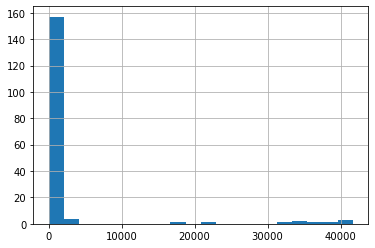

In [18]:
na_in_col = []
for c in aps.columns:
    na_in_col.append(aps[c].isna().sum())
pd.Series(na_in_col).hist(bins=20);

In [19]:
cols_to_drop = []
for c in aps.columns:
    if aps[c].isna().sum() > 5000:
        cols_to_drop.append(c)
aps = aps.drop(columns=cols_to_drop)


In [20]:
aps_test = aps_test.drop(columns=cols_to_drop)

In [21]:
aps.isna().sum().sum()

30982

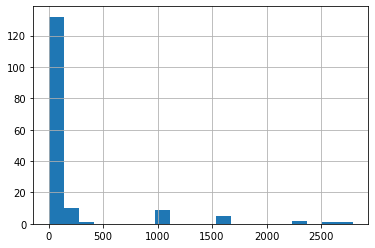

In [22]:
na_in_col = []
for c in aps.columns:
    na_in_col.append(aps[c].isna().sum())
pd.Series(na_in_col).hist(bins=20);

Columns with historgram bins are:  
ag_000 - ag_009 (  7- 16)  
ay_000 - ay_009 ( 33- 42)  
az_000 - az_009 ( 43- 52)  
ba_000 - ba_009 ( 53- 62)  
cn_000 - cn_009 (100-109)  
cs_001 - cs_009 (114-123)  
ee_000 - ee_009 (159-168)  

In [23]:
for i, c in enumerate(aps.columns):
    print(f'{i}: {c}')

0: class
1: aa_000
2: ac_000
3: ad_000
4: ae_000
5: af_000
6: ag_000
7: ag_001
8: ag_002
9: ag_003
10: ag_004
11: ag_005
12: ag_006
13: ag_007
14: ag_008
15: ag_009
16: ah_000
17: ai_000
18: aj_000
19: ak_000
20: al_000
21: am_0
22: an_000
23: ao_000
24: ap_000
25: aq_000
26: ar_000
27: as_000
28: at_000
29: au_000
30: av_000
31: ax_000
32: ay_000
33: ay_001
34: ay_002
35: ay_003
36: ay_004
37: ay_005
38: ay_006
39: ay_007
40: ay_008
41: ay_009
42: az_000
43: az_001
44: az_002
45: az_003
46: az_004
47: az_005
48: az_006
49: az_007
50: az_008
51: az_009
52: ba_000
53: ba_001
54: ba_002
55: ba_003
56: ba_004
57: ba_005
58: ba_006
59: ba_007
60: ba_008
61: ba_009
62: bb_000
63: bc_000
64: bd_000
65: be_000
66: bf_000
67: bg_000
68: bh_000
69: bi_000
70: bj_000
71: bs_000
72: bt_000
73: bu_000
74: bv_000
75: bx_000
76: by_000
77: bz_000
78: ca_000
79: cb_000
80: cc_000
81: cd_000
82: ce_000
83: cf_000
84: cg_000
85: ch_000
86: ci_000
87: cj_000
88: ck_000
89: cl_000
90: cm_000
91: cn_000
9

In [24]:
for c in aps.columns:
    print(aps[c].isna().sum())

0
0
51
1561
0
0
1
1
1
1
1
1
1
1
1
1
22
28
28
272
20
28
20
65
20
65
0
28
28
28
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
22
0
1
0
0
20
20
65
65
41
95
27
27
129
13
0
309
41
130
43
2
1561
1561
1561
11
11
11
2355
2524
0
0
0
0
0
0
0
0
0
0
1561
0
27
0
0
0
0
0
0
0
0
0
0
1106
1106
1106
1106
1106
1106
1106
1106
1106
1
0
148
148
148
148
148
148
148
148
27
0
1
1
2
2
2
2
2
0
0
0
0
148
2792
2355
0
0
0
0
0
0
0
0
0
0
0
0


In [25]:
aps[aps.columns[159:169]].tail(20)

,ef_000,eg_000
59978,0,0
59979,0,0
59980,0,0
59981,0,0
59982,0,0
59983,0,0
59984,0,0
59985,0,0
59987,0,0
59988,0,0


In [26]:
aps[aps.columns[-12:-2]].isna().sum()

ee_000    0
ee_001    0
ee_002    0
ee_003    0
ee_004    0
ee_005    0
ee_006    0
ee_007    0
ee_008    0
ee_009    0
dtype: int64

In [74]:
aps[aps.columns[6:16]].head(20)

,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009
0,0,0,0,0,37250,1432864,3664156,1007684,25896,0
2,0,0,0,0,1648,370592,1883374,292936,12016,0
3,0,0,0,318,2212,3232,1872,0,0,0
4,0,0,0,0,43752,1966618,1800340,131646,4588,0
5,0,0,0,0,9128,701702,1462836,449716,39000,660
7,0,0,0,0,2130,142462,4227340,1674278,59718,876
8,0,0,0,0,458,440704,4398806,2179182,144418,808
9,0,0,0,11804,684444,326536,31586,0,0,0
10,0,0,0,0,4352,713882,1532850,161974,604,0
11,0,0,0,0,2106,418940,2217344,767508,61590,1978


In [28]:
aps[aps.columns[7:17]].isna().sum()

ag_001     1
ag_002     1
ag_003     1
ag_004     1
ag_005     1
ag_006     1
ag_007     1
ag_008     1
ag_009     1
ah_000    22
dtype: int64

In [29]:
na_in_col

[0,
 0,
 51,
 1561,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 22,
 28,
 28,
 272,
 20,
 28,
 20,
 65,
 20,
 65,
 0,
 28,
 28,
 28,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 22,
 0,
 1,
 0,
 0,
 20,
 20,
 65,
 65,
 41,
 95,
 27,
 27,
 129,
 13,
 0,
 309,
 41,
 130,
 43,
 2,
 1561,
 1561,
 1561,
 11,
 11,
 11,
 2355,
 2524,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1561,
 0,
 27,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1106,
 1106,
 1106,
 1106,
 1106,
 1106,
 1106,
 1106,
 1106,
 1,
 0,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 27,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 148,
 2792,
 2355,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [30]:
aps['class'].value_counts()

0    45517
1      474
Name: class, dtype: int64

In [31]:
X_train_imp = pd.read_csv('data/X_train_imp.csv')
y_train = pd.read_csv('data/y_train.csv')

In [32]:
X_test_imp = pd.read_csv('data/X_test_imp.csv')
y_test = pd.read_csv('data/y_test.csv')

In [33]:
scaler = StandardScaler()
scaler.fit(X_train_imp)
X_train_imp_sc = scaler.transform(X_train_imp)
X_test_imp_sc = scaler.transform(X_test_imp)

In [63]:
# pipeline = Pipeline()
logreg = LogisticRegression(random_state=2023, class_weight='balanced', )

In [64]:
logreg.fit(X_train_imp_sc, y_train)

C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=2023)

In [67]:
cross_validate(logreg, X_train_imp_sc, y_train, scoring='recall', )

C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

{'fit_time': array([0.75264502, 0.76015258, 0.7601521 , 0.75214505, 0.93580294]),
 'score_time': array([0.00600505, 0.00500393, 0.00700521, 0.00650549, 0.00550389]),
 'test_score': array([0.95 , 0.885, 0.87 , 0.93 , 0.895])}

In [68]:
y_pred_train = logreg.predict(X_train_imp_sc)

In [69]:
recall_score(y_train, y_pred_train)

0.956

In [37]:
y_pred = logreg.predict(X_test_imp_sc)

In [38]:
display(precision_score(y_test, y_pred))
display(recall_score(y_test, y_pred))
display(f1_score(y_test, y_pred))

0.822429906542056

0.704

0.7586206896551725

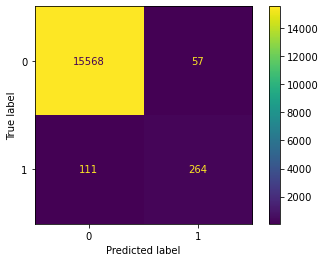

In [39]:
plot_confusion_matrix(logreg, X_test_imp_sc, y_test);

In [40]:
y_pred.sum()

321

In [41]:
dt = DecisionTreeClassifier(random_state=2023)
dt.fit(X_train_imp_sc, y_train)

DecisionTreeClassifier(random_state=2023)

In [42]:
dt.score(X_train_imp_sc, y_train)

1.0

In [43]:
y_pred_dt = dt.predict(X_test_imp_sc)

In [70]:
y_pred_train_dt = dt.predict(X_train_imp_sc)

In [71]:
recall_score(y_train, y_pred_train_dt)

1.0

In [44]:
display(precision_score(y_test, y_pred_dt))
display(recall_score(y_test, y_pred_dt))
display(f1_score(y_test, y_pred_dt))

0.717741935483871

0.712

0.714859437751004

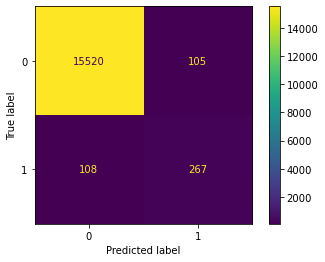

In [45]:
plot_confusion_matrix(dt, X_test_imp_sc, y_test)

In [46]:
sm = SMOTE(random_state=2023, sampling_strategy=0.5)
X_train_imp_sc_sm, y_train_sm = sm.fit_resample(X_train_imp_sc, y_train)

In [47]:
logreg2 = LogisticRegression(random_state=42)
logreg2.fit(X_train_imp_sc_sm, y_train_sm)

C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [48]:
y_pred_sm = logreg2.predict(X_test_imp_sc)

In [49]:
f1_score(y_test, y_pred_sm)

0.6940451745379878

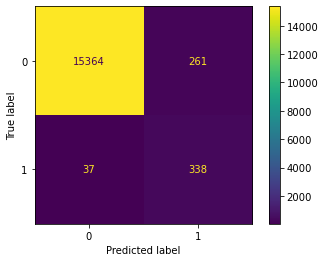

In [50]:
plot_confusion_matrix(logreg2, X_test_imp_sc, y_test);

In [51]:
X_aps = aps[aps.columns[1:]]
y_aps = aps['class']

In [52]:
X_aps_test = aps_test[aps_test.columns[1:]]
y_aps_test = aps_test['class']

In [53]:
knnimputer = KNNImputer(n_neighbors=3)
X_aps_imp = pd.DataFrame(knnimputer.fit_transform(X_aps), columns=X_aps.columns)

In [54]:
X_aps_test_imp = pd.DataFrame(knnimputer.fit_transform(X_aps_test), columns=X_aps_test.columns)

In [55]:
logreg3 = LogisticRegression(random_state=2023)
logreg3.fit(X_aps_imp, y_aps)

C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2023)

In [56]:
y_pred3 = logreg3.predict(X_aps_test_imp)

In [57]:
f1_score(y_pred3, y_aps_test)

0.6529209621993127

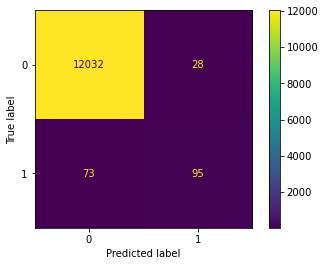

In [58]:
plot_confusion_matrix(logreg3, X_aps_test_imp, y_aps_test)

In [61]:
X_train_imp.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,1.333333,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000,0.000000e+00,247.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.000000,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.000000,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [82]:
def remove_na(df):
    for c in df.columns:
        return df[c].map(lambda x: np.nan if x == 'na' else x)
        
def convert_posneg(series):
    return series.map(lambda x: 0 if x == 'neg' else 1)

In [ ]:
for c in aps.columns:
    aps[c] = aps[c].map(lambda x: np.nan if x == 'na' else x)
aps['class'] = aps['class'].map(lambda x: 0 if x == 'neg' else 1)

In [ ]:
subpipe_rmna = Pipeline(steps=[])
subpipe_psng = Pipeline

In [ ]:
CT = ColumnTransformer()

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)